In [3]:
# python 2
#coding=utf-8
import datetime
import os
import h5py
import numpy as np
import os.path as osp

# f = h5py.File('path/filename.h5','r') #打开h5文件
path_class=osp.join('NTU_CS.h5')
f_class=h5py.File(path_class,'r')
f_class.keys() #可以查看所有的主键
print([key for key in f_class.keys()])


['test_x', 'test_y', 'valid_x', 'valid_y', 'x', 'y']


In [5]:
# print('first, we get values of x_1:', f_class['x'][0])
# print('then, we get values of y_1:', f_class['y'][0])
print(f_class['x'][:].shape)
print(f_class['y'][:].shape)



(38086, 300, 150)
(38086, 60)


In [18]:
class_X=[]
class_Y=[]
        
for i in range(1,61):
    class_x=f_class['x_%d'%i][:]
    class_y=np.argmax(f_class['y_%d'%i][:], -1)
    class_X.append(class_x)
    class_Y.append(class_y)
print(class_Y[0])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [56]:
import torch  ###############开始对训练出来的通道权重进行可视化
m=torch.rand(32,10,1,1)   #bs*C*t*j


In [57]:
m_mean=torch.mean(m,dim=0)

In [58]:
print(m_mean.shape)

torch.Size([10, 1, 1])


In [59]:
m_mean=torch.squeeze(m_mean)

In [78]:
m_mean=m_mean.numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [83]:
m_mean=np.insert(m_mean,0,1,0)  #在最前面插入1   为了使得维度匹配

In [84]:
import csv
csvFile=open("1.csv",'w',newline='')
writer = csv.writer(csvFile)
writer.writerow('index')
for i in range(10):
    writer.writerow(str(i))
                    
with open('1.csv','r') as csvFile:  #此处的csv是源表，即想要写入的表
    rows = csv.reader(csvFile)
    with open('2.csv','w',newline='') as f: #这里的csv则是最后输出得到的新表
        writer = csv.writer(f)
        i = 0
        for row in rows:
            row.append(m_mean[i])
            print(row)
            print(i)
            i = i + 1
            writer.writerow(row)


['i', 'n', 'd', 'e', 'x', 1.0]
0
['0', 0.48864698]
1
['1', 0.42191342]
2
['2', 0.5181415]
3
['3', 0.46776247]
4
['4', 0.44649488]
5
['5', 0.47397086]
6
['6', 0.50348437]
7
['7', 0.43025583]
8
['8', 0.4347442]
9
['9', 0.5475713]
10


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

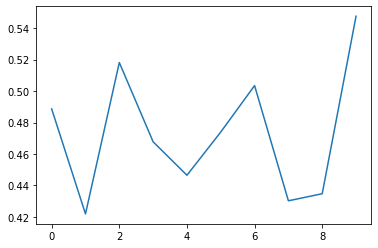

In [63]:
x=range(m_mean.shape[0])
plt.plot(x,m_mean)

In [73]:
print(m_mean[9])

0.5475713


In [22]:
import torch
import csv
import numpy as np
m1=torch.rand(1)
m2=torch.rand(1)
m=[m1,m2]
print(m)

[tensor([0.7834]), tensor([0.2650])]


In [25]:
csv_class_acc=open("class_acc.csv",'w',newline='')
writer = csv.writer(csv_class_acc)
#writer.writerows(m.cpu().numpy())
# for mi in m:
#     print(mi.cpu().tolist())
#     writer.writerows(str(mi.cpu().tolist()))
    
np.savetxt('npresult1.txt',np.array(m))

In [85]:
a=[1,2,3,4,5]
b=[4,5,6,7,8]
a = [i for i in a if i in b]
print(a)

[4, 5]
